# Kmeans

In [1]:
import matplotlib.pyplot as plt
from statistics import mean
import numpy as np
import random

In [85]:
class Kmeans():
    '''Centroid based clustering model, represent each cluster by a single mean vector
        k: int, the number of clusters required to provide
        max_iter: int, max iteration loops to stop 
        tol: tolerance'''
    def __init__(self, k, max_iter, tol):
        self.k = k
        self.m = max_iter
        self.t = tol
        self.fl = 8
        self.fw = 8
        
        
    def fit(self, X):
        # randomly select K samples as the initial K central vectors
        point_label = [0]*len(X)
        full_set = [i for i in range(len(X))]
        centroids_label = []
        centroids = []
        centroids_old = []
        for i in range(self.k):
            centroids_label.append(random.choice(full_set))
            centroids.append(X[centroids_label[i]])
        count = 0
        clusters_label = []
        clusters = []
        # repeat until converge
        while count <= self.m:
            # initialize clusters
            for i in range(self.k):
                clusters.append([])
                clusters_label.append([])
            # expand clusters by calculating distances
            for i in range(len(X)):
                distances = [np.linalg.norm(np.array(X[i]) - np.array(centroid)) for centroid in centroids]
                clusters_label[distances.index(min(distances))].append(i)
                clusters[distances.index(min(distances))].append(X[i])
            # update cluster centroids
            centroids_old = centroids
            for i in range(self.k):
                # evaluate new central vectors
                centroids[i] = list(np.mean(np.array(clusters[i]), axis=0))
            difference = 0.
            for i in range(self.k):
                difference = difference + np.linalg.norm(np.array(centroids_old[i]) - \
                                                         np.array(centroids[i]))
            # stop if all centroids are not updated
            if difference <= self.t:
                break
            count = count + 1
            
        return centroids, clusters, self.k
    
    
    def Kmeans_visualize(self, centroids, clusters, n):
        # 2-D plot
        
        plt.figure(figsize = (self.fl, self.fw))
        # plot centroids
        for i in range(self.k):
            x, y = [], []
            x.append(centroids[i][0])
            y.append(centroids[i][1])
        # plot clusters
            x2, y2 = [], []
            for j in range(len(clusters[i])):
                x2.append(clusters[i][j][0])
                y2.append(clusters[i][j][1])
        
            if(i==0):
                plt.scatter(x2, y2, alpha=0.6, marker='.', cmap=plt.cm.jet, s=200, \
                        label = 'cluster '+str(i))
                plt.scatter(x, y, c='k', alpha=1, marker='*', s=200, label = 'Centroids')
            else:
                plt.scatter(x2, y2, alpha=0.8, marker='.', cmap=plt.cm.jet, s=200, \
                        label = 'cluster '+str(i))
                plt.scatter(x, y, c='k', alpha=1, marker='*', s=200)
            
        plt.grid(True)
        plt.legend() 
        plt.show()

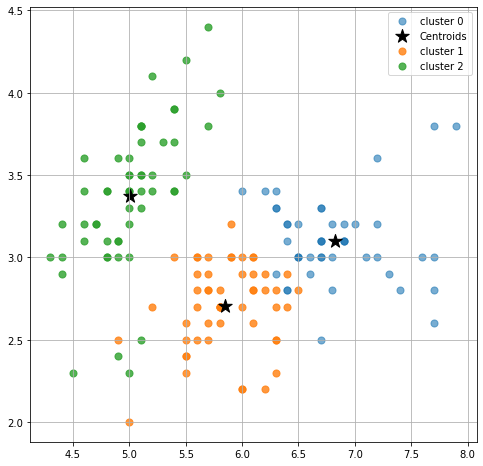

In [100]:
from sklearn.datasets import load_iris

def main():

    data = load_iris()
    X = data['data']
    X.tolist()
    #X = readin_csv_data_clustering("concentric_circles.csv")
    #X = normalization(X, 2)
    model = Kmeans(3, 500, 0.001)
    centroids, clusters, k = model.fit(X)
    #print('cluster number is: ',k)
    #print('cluster centroids are: ',centroids)
    #print('cluster samples are',clusters)
    model.Kmeans_visualize(centroids, clusters, k)
if __name__ == "__main__":
    main()

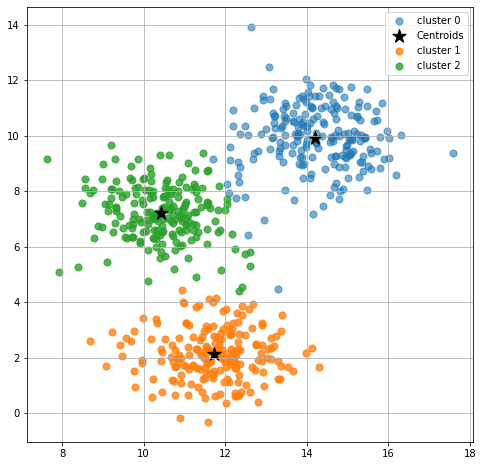

In [94]:
def generate_clustering_data(number_of_centres, number_of_points_per_centre):
    np.random.seed(1)
    for i in range(number_of_centres): 
        means=[25*np.random.random(),10*np.random.random()]
        a=np.random.multivariate_normal(means,[[1,0],[0,1]],number_of_points_per_centre)    
        if i==0:
            X=a
        else:    
            X=np.vstack((X,a))
    X.tolist()
    return X

def main():

    X = generate_clustering_data(3, 200)
    model = Kmeans(3, 4000, 0.0001)
    centroids, clusters, k = model.fit(X)
    model.Kmeans_visualize(centroids, clusters, k)
if __name__ == "__main__":
    main()


